# Import and Visualize Raw Data Files (.csv)

#### This script will import Sonra (STATSports) exports into Python and plot the data. In this eample we will use a Raw Data Extended export.

##### Author: Tiago de Melo Malaquias

## 1) Import packages

First, we will import the necessary Python packages for this script.

In [1]:
import pandas as pd
import numpy as np

from itertools import groupby

import matplotlib.pyplot as plt

## 2) Read the .csv file

Using the pandas package we will read the .csv file and save it as a DataFrame.

In [2]:
pathname = './'
filename = 'STATSports_Player_1_RawDataExtend.csv'

file = pathname + filename
df = pd.read_csv(file)

## 3) Check DataFrame Information

Display some information from the DataFrame: Column names and the entire DataFrame summary.

In [3]:
print("This dataframe contains the columns:")
list_columns = df.columns
print(list_columns)

This dataframe contains the columns:
Index(['Player Display Name', 'Time', 'Lat', 'Lon', 'Speed (m/s)',
       'Heart Rate (bpm)', 'Hacc', 'Hdop', 'Quality of Signal',
       'No. of Satellites', 'Instantaneous Acceleration Impulse', 'Accl X',
       'Accl Y', 'Accl Z', 'Gyro Yro X', 'Gyro Y', 'Gyro Z'],
      dtype='object')


In [4]:
print("The DataFrame :")
display(df)

The DataFrame :


,Player Display Name,Time,Lat,Lon,Speed (m/s),Heart Rate (bpm),Hacc,Hdop,Quality of Signal,No. of Satellites,Instantaneous Acceleration Impulse,Accl X,Accl Y,Accl Z,Gyro Yro X,Gyro Y,Gyro Z
0,Player 1,31:39.8,39.803791,-104.890756,0.0,0,3,0.8,332,18,0.0,0.125904,-0.281088,0.991128,-0.28,-0.70,0.07
1,Player 1,31:39.8,39.803791,-104.890756,0.0,0,3,0.8,332,18,0.0,0.125904,-0.282552,0.990396,-0.28,-0.70,0.00
2,Player 1,31:39.8,39.803791,-104.890756,0.0,0,3,0.8,332,18,0.0,0.126636,-0.284016,0.989664,-0.28,-0.70,0.00
3,Player 1,31:39.8,39.803791,-104.890756,0.0,0,3,0.8,332,18,0.0,0.125904,-0.284748,0.988932,-0.35,-0.70,0.00
4,Player 1,31:39.8,39.803791,-104.890756,0.0,0,3,0.8,332,18,0.0,0.126636,-0.285480,0.989664,-0.35,-0.63,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973165,Player 1,13:52.8,39.803480,-104.890735,0.0,0,0,0.4,344,23,0.0,0.090768,-0.500688,0.709308,-6.65,24.36,55.30
973166,Player 1,13:52.8,39.803480,-104.890735,0.0,0,0,0.4,344,23,0.0,0.084912,-0.428952,0.724680,-10.71,32.69,54.11
973167,Player 1,13:52.8,39.803480,-104.890735,0.0,0,0,0.4,344,23,0.0,0.067344,-0.385764,0.765672,-12.46,41.79,50.68
973168,Player 1,13:52.8,39.803480,-104.890735,0.0,0,0,0.4,344,23,0.0,0.047580,-0.344772,0.826428,-12.81,46.62,44.87


## 4) Simple Calculations

Some basic calculations on the data.

In [5]:
# Speed (Km/h)
df['Speed (km/h)'] = df['Speed (m/s)']*3.6

# Distance
df['Distance (m)'] = df['Speed (m/s)']*(1/100) #Raw data Files are saved at a frequency of 100Hz

# High Metabolic Load Distance (HMLD) 
# HMLD is equal to the distance column where the Instantaneous Acceleration Impulse > 2 and the Speed (km/h)>=19.8. 
# Otherwise is equal to 0
df['HMLD (m)'] = np.where(np.logical_and(abs(df['Instantaneous Acceleration Impulse'])>2, abs(df['Speed (km/h)'])>=19.8), df['Distance (m)'], 0)

# High Speed Running (HSR) distance
# HSR distance is equal to the distance column where the Speed (km/h)>=19.8. 
# Otherwise is equal to 0
df['HSR (m)'] = np.where(abs(df['Speed (km/h)'])>=19.8, df['Distance (m)'], 0)        

# High Intensity Accelerations
df['Acc (n)'] = np.where(df['Instantaneous Acceleration Impulse']>=2, 1, 0)

# High Intensity Decelerations
df['Dec (n)'] = np.where(df['Instantaneous Acceleration Impulse']<=-2, 1, 0)

# High Metabolic Load Distance Efforts (HMLDE)
df['HMLDE (n)'] = np.where(df['HMLD (m)'] > 0, 1, 0)

print("The updated DataFrame :")
display(df)

The updated DataFrame :


,Player Display Name,Time,Lat,Lon,Speed (m/s),Heart Rate (bpm),Hacc,Hdop,Quality of Signal,No. of Satellites,...,Gyro Yro X,Gyro Y,Gyro Z,Speed (km/h),Distance (m),HMLD (m),HSR (m),Acc (n),Dec (n),HMLDE (n)
0,Player 1,31:39.8,39.803791,-104.890756,0.0,0,3,0.8,332,18,...,-0.28,-0.70,0.07,0.0,0.0,0.0,0.0,0,0,0
1,Player 1,31:39.8,39.803791,-104.890756,0.0,0,3,0.8,332,18,...,-0.28,-0.70,0.00,0.0,0.0,0.0,0.0,0,0,0
2,Player 1,31:39.8,39.803791,-104.890756,0.0,0,3,0.8,332,18,...,-0.28,-0.70,0.00,0.0,0.0,0.0,0.0,0,0,0
3,Player 1,31:39.8,39.803791,-104.890756,0.0,0,3,0.8,332,18,...,-0.35,-0.70,0.00,0.0,0.0,0.0,0.0,0,0,0
4,Player 1,31:39.8,39.803791,-104.890756,0.0,0,3,0.8,332,18,...,-0.35,-0.63,0.00,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973165,Player 1,13:52.8,39.803480,-104.890735,0.0,0,0,0.4,344,23,...,-6.65,24.36,55.30,0.0,0.0,0.0,0.0,0,0,0
973166,Player 1,13:52.8,39.803480,-104.890735,0.0,0,0,0.4,344,23,...,-10.71,32.69,54.11,0.0,0.0,0.0,0.0,0,0,0
973167,Player 1,13:52.8,39.803480,-104.890735,0.0,0,0,0.4,344,23,...,-12.46,41.79,50.68,0.0,0.0,0.0,0.0,0,0,0
973168,Player 1,13:52.8,39.803480,-104.890735,0.0,0,0,0.4,344,23,...,-12.81,46.62,44.87,0.0,0.0,0.0,0.0,0,0,0


## 5) Advanced Calculations
More advanced calculations on the data. It requires the definition of auxiliary functions.

### Auxiliary Functions

In [13]:
# Count the groups of 1's present in Entry_list that are bigger than group_size
# Useful to count e.g. Accelerations or Decelerations sustained by a certain period of time given in the number of frames

def find_max_ones(entry_list, group_size):
    final_list = []
    for k, g in groupby(entry_list): #groupby makes an iterator that returns consecutive keys and groups from the iterable.
    	if (k == 1 and len(list(g))>=group_size): #if the value of the group is 1 and the length of the group is bigger than group_size
    		final_list.append(len(list(g)))           
    return len(final_list)

# Finds groups (bigger in size than group_size) of values higher/lower than the input value in an input vector (entry_list). 
# Outputs the groups as a list of values from the computation_list.
def find_group(entry_list, computation_list, group_size, value, string):
    array = np.append(entry_list, -np.inf) # padding so we don't lose last element
    array_final = np.append(computation_list, -np.inf)
    if string == 'higher':
        mask = array <= value  # Remove values lower and equal than the value
    if string == 'lower':
        mask = array >= value # Remove values higer and equal than the value
    split_indices = np.where(mask)[0]
    final_list = []
    for subarray in np.split(array_final, split_indices+1):
        if len(subarray) > group_size:
            final_list.append(subarray[0:-1])
    return final_list

### Metric Counts

In [14]:
# Total High Metabolic Load Distance Efforts (HMLDE): Number of times HMLD is sustained for at least 0.4sec
HMLDE = find_max_ones(df['HMLDE (n)'],40)
print('Total High Metabolic Load Distance Efforts (HMLDE) =', HMLDE)

# Sprint Distance (SD): Total distance sustained at a Speed >=19.8  for at least 1sec
high_speed_list = find_group(df['Speed (km/h)'],df['Distance (m)'], 100, 19.8, 'higher') #1 sec = 100 entries
total_sprint_distance = sum([val for sublist in high_speed_list for val in sublist])
print('Total Sprint Distance =', total_sprint_distance)

# Number of High Intensity Accelerations: Number of times Accelerations are sustained at >=2 for at least 0.5sec
total_n_high_acc = find_max_ones(df['Acc (n)'],50) #0.5sec = 50 entries
high_acc = find_group(df['Instantaneous Acceleration Impulse'], df.index, 50,2,'higher')
print('Number of High Intensity Accelerations =', total_n_high_acc)

# Number of High Intensity Decelerations: Number of times Decelerations are sustained <= -2 for at least 0.5sec
total_n_high_dec = find_max_ones(df['Dec (n)'],50) #0.5 sec  = 50 entries
high_dec = find_group(df['Instantaneous Acceleration Impulse'], df.index, 50,-2,'lower')
print('Number of High Intensity Decelerations =', total_n_high_dec)

Total High Metabolic Load Distance Efforts (HMLDE) = 0
[ True  True  True ...  True  True  True]
[     0      1      2 ... 973168 973169 973170]
Total Sprint Distance = 0
[ True  True  True ...  True  True  True]
[     0      1      2 ... 973168 973169 973170]
Number of High Intensity Accelerations = 142
[ True  True  True ...  True  True False]
[     0      1      2 ... 973167 973168 973169]
Number of High Intensity Decelerations = 0


## 6) Plotting
Here we will plot some of the metrics.

In [ ]:
# Time Vector
time_vec = df.index*0.01/60 #Time vector in minutes

### Acceleration and Deceleration

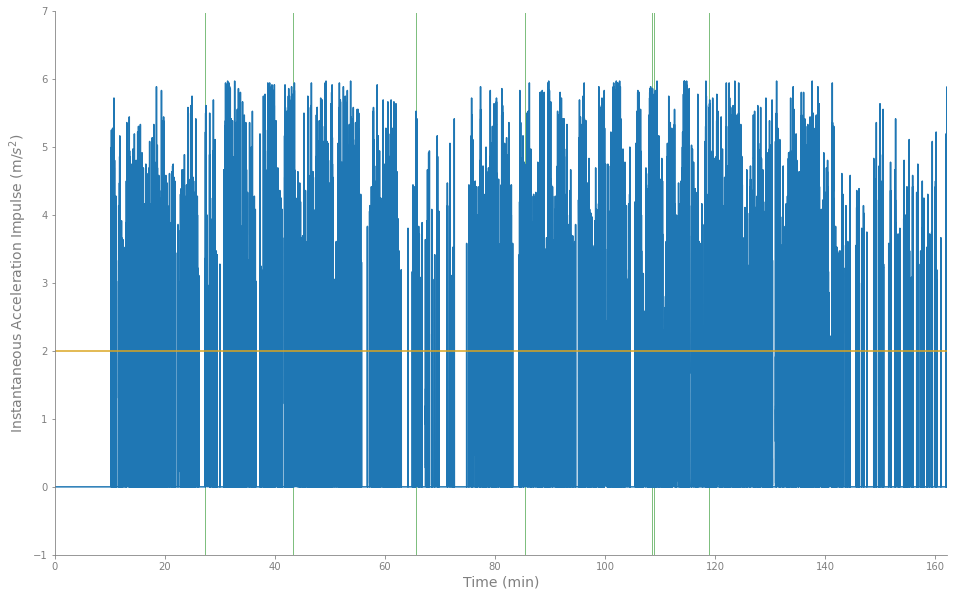

In [39]:
plt.figure('Instantaneous Acceleration Impulse',figsize=(16.0, 10.0))   
plt.plot(time_vec, df['Instantaneous Acceleration Impulse'])

# Horizontal lines for acceleration and deceleration
plt.plot([time_vec[0], time_vec[-1]],[-2,-2],color = 'goldenrod')
plt.plot([time_vec[0], time_vec[-1]],[2,2],color = 'goldenrod')
ax = plt.gca()

# Shaded rectangles for accelertion - Green
acc_bool = [0] * len(time_vec)
ac = 1
for rec in high_acc:
    aux_list = list(rec)
    aux_list = [int(i) for i in aux_list]
    for t in aux_list:
        acc_bool[t] = 1
    ac += 1       
ax.fill_between(time_vec, min(df['Instantaneous Acceleration Impulse'])-1, max(df['Instantaneous Acceleration Impulse'])+1, where=acc_bool, facecolor='green', alpha=0.5)

# Shaded rectangles for decelerations - Red
dec_bool = [0] * len(time_vec)
dc = 1
for rec in high_dec:
    aux_list = list(rec)
    aux_list = [int(i) for i in aux_list]
    for t in aux_list:
        dec_bool[t] = 1
    dc += 1       
ax.fill_between(time_vec, min(df['Instantaneous Acceleration Impulse'])-1, max(df['Instantaneous Acceleration Impulse'])+1, where=dec_bool, facecolor='red', alpha=0.5)

# Axis Properties
plt.xlim(time_vec[0],time_vec[-1])
plt.ylim(round(min(df['Instantaneous Acceleration Impulse'])-1),round(max(df['Instantaneous Acceleration Impulse'])+1))
plt.ylabel('Instantaneous Acceleration Impulse (G)', fontsize=14)
plt.xlabel('Time (min)', fontsize=14)

# Axis color
ax.spines['bottom'].set_color('grey') 
ax.spines['left'].set_color('grey')
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.yaxis.label.set_color('grey')
ax.xaxis.label.set_color('grey')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)    

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

### Sprints

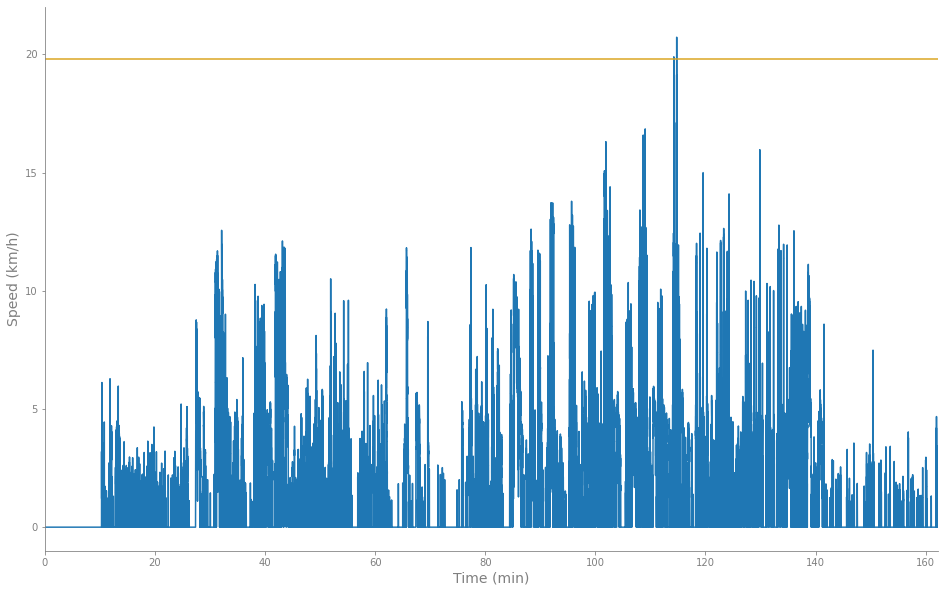

In [41]:
plt.figure('Speed (km/h)', figsize=(16.0, 10.0))   
plt.plot(time_vec,df['Speed (km/h)'])

# Horizontal lines for acceleration and deceleration
plt.plot([time_vec[0], time_vec[-1]],[19.8,19.8],color = 'goldenrod')
ax = plt.gca()

# Shaded rectangles for each Sprint - Green
spri_bool = [0] * len(time_vec)
sp = 1
for rec in high_speed_list :
    aux_list = list(rec)
    aux_list = [int(i) for i in aux_list]
    for t in aux_list:
        spri_bool[t] = 1
        #Add text to plot for each Sprint
    plt.text(time_vec[int(rec[-1])], max(df['Speed (km/h)']) + 0.5, 'S ' + str(sp), fontsize=10, color='green', alpha=0.5, rotation = 'vertical')
    sp += 1 

ax.fill_between(time_vec, min(df['Speed (km/h)']), max(df['Speed (km/h)'])+1, where=spri_bool, facecolor='green', alpha=0.5)


# Axis Properties
plt.xlim(time_vec[0],time_vec[-1])
plt.ylim(round(min(df['Speed (km/h)'])-1),round(max(df['Speed (km/h)'])+1))
plt.ylabel('Speed (km/h)', fontsize=14)
plt.xlabel('Time (min)', fontsize=14)

# Axis color
ax.spines['bottom'].set_color('grey') 
ax.spines['left'].set_color('grey')
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.yaxis.label.set_color('grey')
ax.xaxis.label.set_color('grey')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
    
plt.show()

### Distance

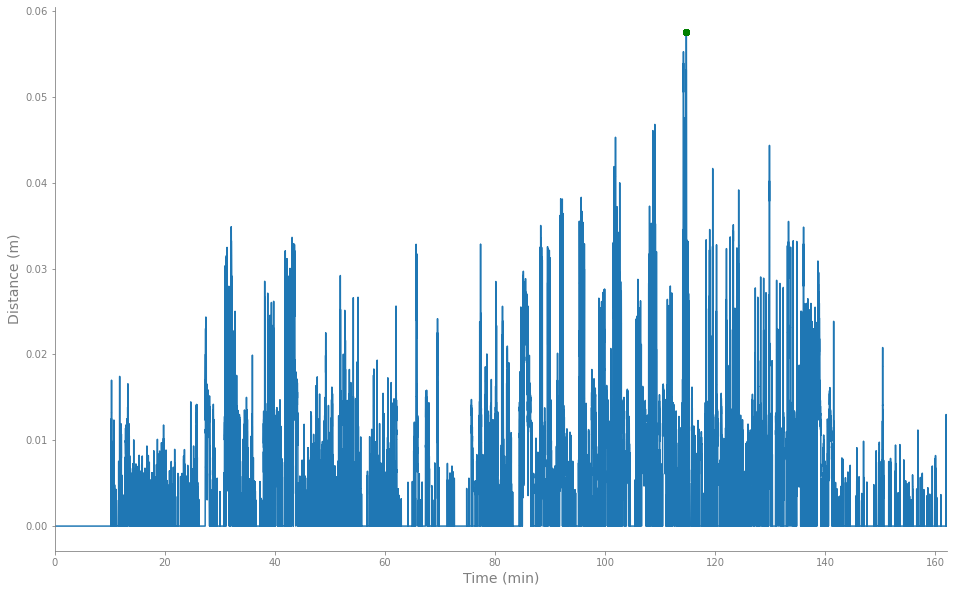

In [44]:
plt.figure('Distance (m)',figsize=(16.0, 10.0))
plt.plot(time_vec,df['Distance (m)'])
plt.plot(time_vec[df['HMLD (m)'] > 0],df['HMLD (m)'][df['HMLD (m)'] > 0],linestyle='None',marker='o',color='green')
ax = plt.gca()

# Axis Properties
plt.xlim(time_vec[0],time_vec[-1])
plt.xlabel('Time (min)', fontsize=14)
plt.ylabel('Distance (m)', fontsize=14)

# Axis color
ax.spines['bottom'].set_color('grey') 
ax.spines['left'].set_color('grey')
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.yaxis.label.set_color('grey')
ax.xaxis.label.set_color('grey')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)    

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

## References

[1] Tierney, P. J., Young, A., Clarke, N. D., & Duncan, M. J. (2016). Match play demands of 11 versus 11 professional football using Global Positioning System tracking: Variations across common playing formations. Human Movement Science, 49(August), 1–8

[2] Moreno-Perez, V., Malone, S., Sala-Perez, L., Lapuente-Sagarra, M., Campos-Vazquez, M.A. and Del Coso, J. (2019). Activity Monitoring in Professional Soccer Goalkeepers During Training and Match Play. International Journal of Performance Analysis in Sport, 20, (1), 19 – 30

[3] Silva, Pedro; Santos, Eduardo Dos; Grishin, Mikhail1; Rocha, José Mário. 'Validity of Heart Rate-Based Indices to Measure Training Load and Intensity in Elite Football Players'The Journal of Strength & Conditioning Research: August 2018 - Volume 32 - Issue 8 - p 2340-2347

[4] https://support.statsports.com/hc/en-us/articles/360007296712-What-metrics-does-APEX-Athlete-Series-Product-track-

[5] Higham DG, Pyne DB, Anson JM, Eddy A. Movement patterns in rugby sevens: Effects of tournament level, fatigue and substitute players. Journal of Science and Medicine in Sport Volume 15, Issue 3, May 2012, Pages 277–282   